In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import scanpy as sc
adata_all = sc.read_h5ad("scanpy_withscreen/batch12_iGlut_post_raw_all_xgb.h5ad")

sc_markers_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_post.head()

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_02__s1,iGlut_post_p1,hg38,3542,9141,11365,A1,A1,A2,1,1,...,0.0,0,0,50,0,0,0.542512,39.629030,-1.988116,7.912624
01_01_12__s1,iGlut_post_p1,hg38,1176,1940,2390,A1,A1,A12,1,1,...,0.0,0,0,50,0,0,6.332805,39.521160,-3.288275,8.063947
01_01_16__s1,iGlut_post_p1,hg38,3393,8576,10612,A1,A1,B4,1,1,...,0.0,0,0,50,0,0,28.295320,26.426134,-1.621965,-1.320243
01_01_22__s1,iGlut_post_p1,hg38,2650,5700,7061,A1,A1,B10,1,1,...,0.0,0,0,50,0,0,42.816700,21.352268,-1.820428,-2.448944
01_01_55__s1,iGlut_post_p1,hg38,1970,3873,4844,A1,A1,E7,1,1,...,0.0,0,0,50,0,0,19.640999,-2.478396,3.294251,-1.841123


In [75]:
def cluster_avg_expr(adata,clustering):
    cluster_avg_subset = pd.DataFrame(columns=adata.var_names, index=adata.obs[clustering].cat.categories)                                                                                                 
    for clust in adata.obs[clustering].cat.categories: 
        cluster_avg_subset.loc[clust] = adata[adata.obs[clustering].isin([clust]),:].X.sum(0)


    cluster_avg_subset = cluster_avg_subset.astype('float')
    cluster_avg_subset = cluster_avg_subset.T
    return(cluster_avg_subset)



In [102]:
meta = pd.read_csv("seurat_withscreen/query_meta_pred_clustering_transfer_50PCs.tsv",sep="\t",index_col=0)

<AxesSubplot: >

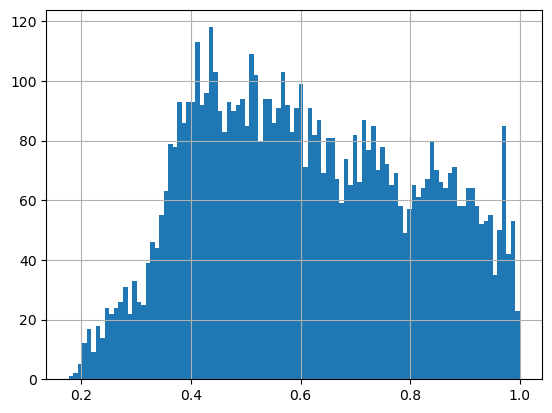

In [103]:
meta['prediction.score.max'].hist(bins=100)

In [104]:
meta_assigned = meta.loc[meta['prediction.score.max']>0.79].copy()

In [105]:
meta_assigned

,orig.ident,nCount_RNA,nFeature_RNA,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,...,prediction.score.42,prediction.score.80,prediction.score.45,prediction.score.21,prediction.score.84,prediction.score.56,prediction.score.0,prediction.score.100,prediction.score.49,prediction.score.max
AACAAGAAGAACCCGA-1,SeuratProject,62928,8110,OE_batch1,8830,9.086024,65610,11.091498,12.114007,947,...,0.0,0,0.0,0,0.000000,0,0,0,0,0.829919
AACACACAGACGTCCC-1,SeuratProject,50251,7675,OE_batch1,8330,9.027739,52218,10.863202,13.074036,504,...,0.0,0,0.0,0,0.000000,0,0,0,0,0.827830
AAGTACCCAGCAGTCC-1,SeuratProject,118285,9942,OE_batch1,10749,9.282661,122568,11.716430,8.857940,2503,...,0.0,0,0.0,0,0.010859,0,0,0,0,0.989141
AATGCCACATCGATCA-1,SeuratProject,68293,8505,OE_batch1,9417,9.150378,71268,11.174217,9.876803,1458,...,0.0,0,0.0,0,0.011502,0,0,0,0,0.988498
ACATCGAGTCTAGATC-1,SeuratProject,50132,7902,OE_batch1,8603,9.059982,52503,10.868645,12.490715,696,...,0.0,0,0.0,0,0.000000,0,0,0,0,0.906967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCCGAAGGA-2,SeuratProject,17493,5612,OE_batch2,5975,8.695507,18377,9.818910,8.744626,416,...,0.0,0,0.0,0,0.031153,0,0,0,0,0.968847
TTTGGTTAGAGGGTGG-2,SeuratProject,12771,4674,OE_batch2,4903,8.497806,13269,9.493261,8.357827,421,...,0.0,0,0.0,0,0.083415,0,0,0,0,0.916585
TTTGGTTGTAACTGCT-2,SeuratProject,12350,4045,OE_batch2,4289,8.364042,12819,9.458762,12.504876,478,...,0.0,0,0.0,0,0.000000,0,0,0,0,0.839660
TTTGGTTGTATAGCTC-2,SeuratProject,31276,6940,OE_batch2,7399,8.909235,32561,10.390902,11.025460,1448,...,0.0,0,0.0,0,0.071851,0,0,0,0,0.888095


In [106]:
adata_all_oe = adata_all[adata_all.obs['experiment']=='oe'].copy()
adata_all_screen = adata_all[adata_all.obs['experiment']=='screen'].copy()

In [107]:
adata_all_screen.obs = sc_meta_post.loc[adata_all_screen.obs.index]

In [108]:
meta_oe_xgb = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [109]:
predictions = [x for x in meta_assigned.columns if 'prediction.score' in x]
predictions = [x for x in predictions if x!='prediction.score.max']

In [110]:
meta_assigned['final_clustering'] = meta_assigned[predictions].T.idxmax()

In [111]:
adata_all_oe_assigned = adata_all_oe[meta_assigned.index,:].copy()
adata_all_oe_assigned.obs = meta_assigned.loc[adata_all_oe_assigned.obs.index]

In [112]:
adata_all_oe_assigned.obs['final_clustering'] = adata_all_oe_assigned.obs['final_clustering'].astype('category')
adata_all_screen.obs['final_clustering'] = adata_all_screen.obs['final_clustering'].astype('category')

In [113]:
oe_clusters = cluster_avg_expr(adata_all_oe_assigned,'final_clustering')
screen_clusters = cluster_avg_expr(adata_all_screen,'final_clustering')

In [114]:
import re

In [115]:
oe_clusters.columns = [int(re.sub("prediction.score.","",x)) for x in oe_clusters.columns]

In [116]:
oe_clusters_CPT = np.log1p(oe_clusters/oe_clusters.sum()*1e4)
screen_clusters_CPT = np.log1p(screen_clusters/screen_clusters.sum()*1e4)

In [117]:
screen_clusters_CPT = screen_clusters_CPT[oe_clusters_CPT.columns]

In [118]:
all_markers_plot = []
for cluster in oe_clusters_CPT.columns:
    cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:10])
    all_markers_plot = all_markers_plot + cluster_markers


In [119]:
all_markers_plot = [x for x in all_markers_plot if x in screen_clusters_CPT.index]

In [120]:
oe_clusters_CPT_Z = (oe_clusters_CPT.T-oe_clusters_CPT.T.mean())/oe_clusters_CPT.T.std()
oe_clusters_CPT_Z = oe_clusters_CPT_Z.T

In [121]:
screen_clusters_CPT_Z = (screen_clusters_CPT.T-screen_clusters_CPT.T.mean())/screen_clusters_CPT.T.std()
screen_clusters_CPT_Z = screen_clusters_CPT_Z.T

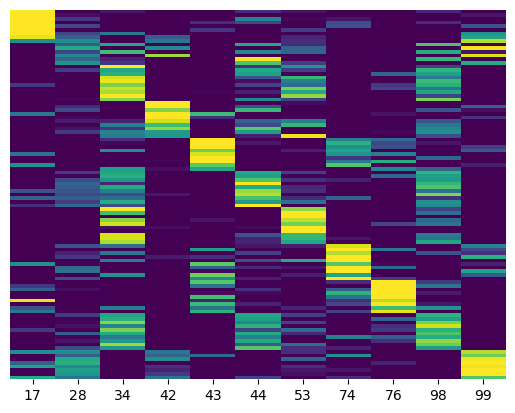

In [175]:
sns.heatmap(screen_clusters_CPT_Z.loc[all_markers_plot],cmap='viridis',vmin=0,vmax=2,cbar=False)
plt.yticks([])
plt.savefig("figures/Seurat_labeltransfer_clusters_screendata_Znorm_0_2.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

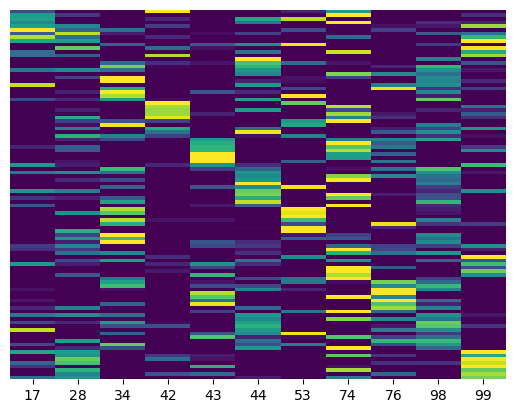

In [177]:
sns.heatmap(oe_clusters_CPT_Z.loc[all_markers_plot],cmap='viridis',vmin=0,vmax=2,cbar=False)
plt.yticks([])
plt.savefig("figures/Seurat_labeltransfer_clusters_oedata_Znorm_0_2.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [124]:
morphogens = ['XAV','CHIR','RA','FGF8','BMP4','SHH']
morphogens = ['M_'+x for x in morphogens]
morphogens.append('final_clustering')

In [125]:
sc_meta_post_morph = sc_meta_post[morphogens].copy()

morphogens = ['XAV','CHIR','RA','FGF8','BMP4','SHH']
morphogens = ['M_'+x for x in morphogens]
sc_meta_post_morph[morphogens] = np.log1p(sc_meta_post_morph[morphogens])

cluster_data = sc_meta_post_morph.groupby('final_clustering').mean()

In [126]:
cluster_data = np.expm1(cluster_data)

In [127]:
cluster_data.loc[oe_clusters.columns]

,M_XAV,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH
17,0.116454,0.563881,0.106601,4.796745,0.004488,29.931283
28,0.023330,2.497180,0.123577,6.445474,0.000000,16.381393
34,0.120014,2.487926,11.568836,0.342002,0.007938,21.736847
42,0.025610,2.422719,2.637067,3.937249,0.367693,22.082362
43,0.201890,0.451042,0.410532,2.932115,1.139884,8.600261
44,0.049193,2.485570,0.167820,8.012448,0.004600,20.441516
53,0.025689,2.327258,18.210460,0.643040,0.352704,18.095199
74,0.225537,0.154437,0.095338,2.915562,0.074267,24.052192
76,0.310675,0.877923,0.076664,3.592389,0.004890,21.021238
98,0.029785,2.702062,0.201435,10.596052,0.006297,22.711624


In [128]:
meta_assigned['final_label2'] = meta_oe_xgb.loc[meta_assigned.index,'final_label']
meta_assigned['combined_label'] = meta_oe_xgb.loc[meta_assigned.index,'combined_label']

In [129]:
meta_assigned.loc[meta_assigned['final_label2']!=meta_assigned['final_label'],'final_label'].value_counts()

unknown          57
label_TCF7L2     13
label_TLX2        5
label_NEUROD1     4
label_RXRG        3
label_SMAD9       1
label_EGFP        1
label_HOXB3       1
label_TCF7L1      1
label_LEF1        1
Name: final_label, dtype: int64

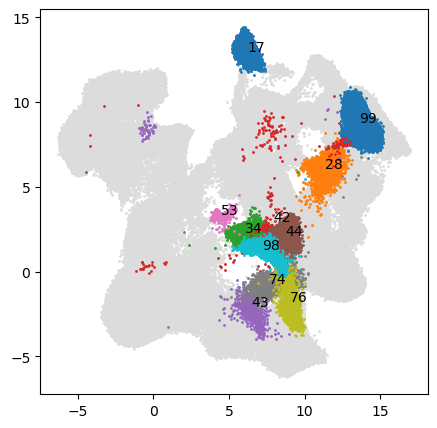

In [179]:
x,y = sc_meta_post['umap_1'],sc_meta_post['umap_2']
plt.figure(figsize=(5,5))
plt.scatter(x,y,c='gainsboro',s=1)
for cluster in oe_clusters_CPT.columns:
    sc_meta_post_cluster = sc_meta_post.loc[sc_meta_post['final_clustering']==cluster]
    x,y = sc_meta_post_cluster['umap_1'],sc_meta_post_cluster['umap_2']
    plt.scatter(x,y,label=cluster,s=1)
    x_m,y_m = np.median(x),np.median(y)
    plt.text(x_m,y_m,cluster)
plt.savefig("figures/Seurat_labeltransfer_clusters_umap_screen.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [ ]:
for sample in samples:
    
    #get metadata
    meta = sc_meta_post


In [135]:
sc_meta_post

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_02__s1,iGlut_post_p1,hg38,3542,9141,11365,A1,A1,A2,1,1,...,0.0,0,0,50,0,0,0.542512,39.629030,-1.988116,7.912624
01_01_12__s1,iGlut_post_p1,hg38,1176,1940,2390,A1,A1,A12,1,1,...,0.0,0,0,50,0,0,6.332805,39.521160,-3.288275,8.063947
01_01_16__s1,iGlut_post_p1,hg38,3393,8576,10612,A1,A1,B4,1,1,...,0.0,0,0,50,0,0,28.295320,26.426134,-1.621965,-1.320243
01_01_22__s1,iGlut_post_p1,hg38,2650,5700,7061,A1,A1,B10,1,1,...,0.0,0,0,50,0,0,42.816700,21.352268,-1.820428,-2.448944
01_01_55__s1,iGlut_post_p1,hg38,1970,3873,4844,A1,A1,E7,1,1,...,0.0,0,0,50,0,0,19.640999,-2.478396,3.294251,-1.841123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96_93_63__s3,iGlut_post_p2,hg38,3154,7644,10084,H12,H9,F3,96,93,...,3.0,0,250,0,500,0,-33.780346,-30.079912,13.292809,9.224515
96_93_94__s3,iGlut_post_p2,hg38,2354,5356,7052,H12,H9,H10,96,93,...,3.0,0,250,0,500,0,-25.967556,-13.684648,6.533184,12.869455
96_94_17__s3,iGlut_post_p2,hg38,4757,15420,20202,H12,H10,B5,96,94,...,3.0,0,250,0,500,0,-14.884810,-24.603449,12.179929,6.791068
96_95_58__s3,iGlut_post_p2,hg38,2043,3831,5024,H12,H11,E10,96,95,...,3.0,0,250,0,500,0,-29.202790,-39.041492,14.828094,7.658021


In [141]:
sc_meta_post['sample'] = [re.sub("_post_p.*","_post",x) for x in sc_meta_post['sample']]
sc_meta_post['sample_cluster'] = sc_meta_post['sample']+"_"+sc_meta_post['final_clustering'].astype('str')
sc_meta_post['condition'] = sc_meta_post['sample']+'_'+sc_meta_post['AP_axis']+"_"+sc_meta_post['DV_axis']+"_"+sc_meta_post['Basal_media']

sc_meta_post['M_CycA'] = sc_meta_post['CycA']

#one-hot-encoding of basal media
BM_list = ['N2B27_SB_CHIR', 'mTeSR', 'NIM', 'N2B27_2Si']
for media in BM_list:
    sc_meta_post[media] = 0
    sc_meta_post.loc[sc_meta_post['Basal_media']==media,media] = 1

#add experimental variables
sc_meta_post['NGN2'] = 1
sc_meta_post['ASCL1'] = 0
sc_meta_post['timing'] = 1


#create dataframe per cluster
cluster_comp = pd.DataFrame(index=list(set(sc_meta_post['sample_cluster'])),columns=list(set(sc_meta_post['condition'])))

#get information for each condition
meta_conditions = sc_meta_post.groupby('condition').head(n=1)
meta_conditions.index = meta_conditions['condition']

for cond in list(set(sc_meta_post['condition'])):
    meta_c = sc_meta_post.loc[sc_meta_post['condition']==cond]
    cond_concentrations = meta_c[morphogens].mean()
    
    meta_c_comp = meta_c['sample_cluster'].value_counts()
    cluster_comp.loc[meta_c_comp.index,cond] = meta_c_comp

cluster_comp = cluster_comp.fillna(0)


In [144]:
cluster_comp = cluster_comp/cluster_comp.sum()
a = cluster_comp.T.idxmax()
b = cluster_comp.T.max()
a = pd.DataFrame(a)
b = pd.DataFrame(b)
c = pd.merge(a,b, left_index=True,right_index=True)
c.columns = ['cond','purity']

variables = ['M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 
             'M_BMP4', 'M_SHH', 
             'M_CycA',
             'N2B27_SB_CHIR', 'mTeSR', 'NIM', 'N2B27_2Si',
             'NGN2', 'ASCL1', 'timing',
            'AP_axis','DV_axis','Basal_media']

tmp = pd.DataFrame(meta_conditions.loc[c['cond'],variables])
tmp.index = c.index
c = pd.merge(c,tmp,left_index=True,right_index=True)

In [153]:
c.loc[['iGlut_post_'+str(x) for x in oe_clusters_CPT.columns]]

,cond,purity,M_XAV,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_CycA,N2B27_SB_CHIR,mTeSR,NIM,N2B27_2Si,NGN2,ASCL1,timing,AP_axis,DV_axis,Basal_media
iGlut_post_17,iGlut_post_FGF8_3_SHH_4_mTeSR,0.100257,0.0,0.0,0,100,0,500,0,0,1,0,0,1,0,1,FGF8_3,SHH_4,mTeSR
iGlut_post_28,iGlut_post_CHIR_4_ctrl_mTeSR,0.130617,0.0,3.0,0,0,0,0,0,0,1,0,0,1,0,1,CHIR_4,ctrl,mTeSR
iGlut_post_34,iGlut_post_RA_2_CHIR_SHH_4_mTeSR,0.155172,0.0,3.0,10,0,0,500,0,0,1,0,0,1,0,1,RA_2_CHIR,SHH_4,mTeSR
iGlut_post_42,iGlut_post_RA_4_CHIR_SHH_4_mTeSR,0.051335,0.0,3.0,1000,0,0,500,0,0,1,0,0,1,0,1,RA_4_CHIR,SHH_4,mTeSR
iGlut_post_43,iGlut_post_XAV_3_SHH_3_mTeSR,0.027534,5.0,0.0,0,0,0,150,0,0,1,0,0,1,0,1,XAV_3,SHH_3,mTeSR
iGlut_post_44,iGlut_post_CHIR_4_SHH_1_mTeSR,0.095908,0.0,3.0,0,0,0,15,0,0,1,0,0,1,0,1,CHIR_4,SHH_1,mTeSR
iGlut_post_53,iGlut_post_RA_2_CHIR_SHH_3_mTeSR,0.048866,0.0,3.0,10,0,0,150,0,0,1,0,0,1,0,1,RA_2_CHIR,SHH_3,mTeSR
iGlut_post_74,iGlut_post_XAV_1_SHH_4_mTeSR,0.105364,0.2,0.0,0,0,0,500,0,0,1,0,0,1,0,1,XAV_1,SHH_4,mTeSR
iGlut_post_76,iGlut_post_XAV_3_SHH_2_mTeSR,0.192661,5.0,0.0,0,0,0,50,0,0,1,0,0,1,0,1,XAV_3,SHH_2,mTeSR
iGlut_post_98,iGlut_post_FGF8_2_CHIR_SHH_3_mTeSR,0.124214,0.0,3.0,0,50,0,150,0,0,1,0,0,1,0,1,FGF8_2_CHIR,SHH_3,mTeSR


In [168]:
label_composition = pd.DataFrame(index = list(set(meta_assigned['final_clustering']))+['ncells'],
                                 columns=list(set(meta_assigned['final_label'])))
for label in meta['final_label']:
    meta_label = meta.loc[meta['final_label']==label]
    a = meta_assigned.loc[meta_assigned['final_label2']==label,'final_clustering'].value_counts()
    label_composition.loc[a.index,label] = a/len(meta_label.index)
    label_composition.loc['ncells',label] = len(meta_label.index)

In [169]:
label_composition = label_composition.fillna(0)

In [170]:
label_composition

,unknown,label_TCF7L1,label_LHX9,label_NFATC1,label_ZFHX3,label_NEUROD1,label_TLX2,label_TCF7L2,label_SMAD9,label_LEF1,label_PHOX2B,label_EGFP,label_HOXB3,label_MSX1,label_RXRG,label_MEIS2,label_RARB,label_LHX4
prediction.score.98,0.076906,0.046296,0.000000,0.077922,0.357143,0.051724,0.008681,0.117409,0.000000,0.205882,0.000000,0.142857,0.0,0.005571,0.000,0.0,0.0,0.166667
prediction.score.76,0.002236,0.009259,0.007692,0.000000,0.000000,0.000000,0.000000,0.008097,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000
prediction.score.34,0.018332,0.000000,0.000000,0.019481,0.000000,0.040230,0.000000,0.008097,0.000000,0.014706,0.000000,0.000000,0.0,0.019499,0.000,0.0,0.0,0.000000
prediction.score.99,0.005142,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000,0.004049,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000
prediction.score.74,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000
prediction.score.28,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000
prediction.score.42,0.007154,0.018519,0.076923,0.006494,0.000000,0.005747,0.000000,0.000000,0.090909,0.000000,0.023256,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000
prediction.score.44,0.015649,0.009259,0.000000,0.012987,0.000000,0.000000,0.000000,0.004049,0.000000,0.044118,0.000000,0.400000,0.0,0.002786,0.125,0.0,0.0,0.000000
prediction.score.53,0.087860,0.185185,0.000000,0.045455,0.142857,0.091954,0.312500,0.085020,0.000000,0.073529,0.000000,0.228571,0.2,0.245125,0.000,0.0,0.0,0.166667
prediction.score.43,0.000894,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000,0.004049,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000


In [110]:
label_composition = pd.DataFrame(index = list(set(meta_assigned['final_clustering'])),
                                 columns=list(set(meta_assigned['final_label'])))
for label in list(set(meta_assigned['final_label'])):
    meta_assigned_label = meta_assigned.loc[meta_assigned['final_label']==label]
    a = meta_assigned_label['final_clustering'].value_counts()
    label_composition.loc[a.index,label] = a

In [111]:
label_composition = label_composition.fillna(0)

In [122]:
labels_plot = list(label_composition.columns[label_composition.sum()>10])

In [115]:
label_composition_norm = label_composition/label_composition.sum()*100

<AxesSubplot: >

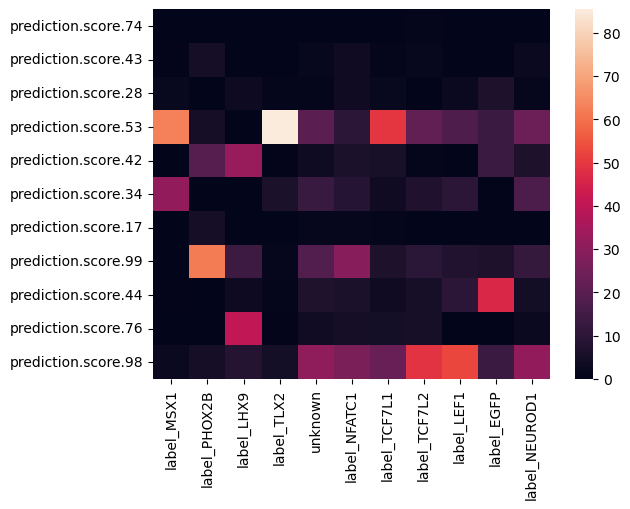

In [123]:
sns.heatmap(label_composition_norm[labels_plot])

In [100]:
for cluster in list(set(meta_assigned['final_clustering'])):
    print(cluster)
    meta_assigned_cluster = meta_assigned.loc[meta_assigned['final_clustering']==cluster]
    print(meta_assigned_cluster['final_label'].value_counts())

prediction.score.28
unknown         2
label_TCF7L1    1
label_NFATC1    1
Name: final_label, dtype: int64
prediction.score.53
unknown          413
label_TLX2       186
label_MSX1        90
label_TCF7L1      46
label_TCF7L2      23
label_NEUROD1     17
label_EGFP         8
label_NFATC1       7
label_LEF1         5
label_ZFHX3        2
label_HOXB3        1
label_LHX4         1
Name: final_label, dtype: int64
prediction.score.17
unknown         18
label_EGFP       1
label_NFATC1     1
label_PHOX2B     1
Name: final_label, dtype: int64
prediction.score.34
unknown          130
label_MSX1        16
label_NEUROD1      7
label_TCF7L2       5
label_LEF1         3
label_NFATC1       3
label_ZFHX3        1
label_TCF7L1       1
label_TLX2         1
Name: final_label, dtype: int64
prediction.score.42
unknown          37
label_LHX9       12
label_TCF7L1      4
label_PHOX2B      3
label_EGFP        2
label_NFATC1      2
label_NEUROD1     2
label_SMAD9       1
label_TCF7L2      1
Name: final_label, dt

In [93]:
for cluster in list(set(meta_assigned['final_clustering'])):
    meta_assigned_cluster = meta_assigned.loc[meta_assigned['final_clustering']==cluster]
    print(meta_assigned_cluster['final_label'].value_counts())

unknown         2
label_TCF7L1    1
label_NFATC1    1
Name: final_label, dtype: int64
unknown          425
label_TLX2       177
label_MSX1        88
label_TCF7L1      46
label_TCF7L2      28
label_NEUROD1     18
label_NFATC1       7
label_LEF1         5
label_EGFP         2
label_HOXB3        2
label_RXRG         1
Name: final_label, dtype: int64
unknown         19
label_NFATC1     1
label_PHOX2B     1
Name: final_label, dtype: int64
unknown          130
label_MSX1        16
label_NEUROD1      7
label_TCF7L2       6
label_NFATC1       3
label_LEF1         2
label_ZFHX3        1
label_TCF7L1       1
label_TLX2         1
Name: final_label, dtype: int64
unknown          36
label_LHX9       12
label_TCF7L1      4
label_PHOX2B      3
label_NEUROD1     3
label_RXRG        2
label_NFATC1      2
label_EGFP        1
label_TCF7L2      1
Name: final_label, dtype: int64
unknown          428
label_TCF7L2      42
label_NEUROD1     17
label_NFATC1      15
label_LEF1        14
label_TCF7L1      13
lab

In [125]:
adata_seurat = sc.read_h5ad("seurat_withscreen/data_integrated_SCT_50PCs_all_screencells.h5ad")

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [126]:
meta_seurat = adata_seurat.obs.copy()

In [128]:
meta_seurat['seurat_clusters']

43_96_51__s3          16
34_73_51__s2          14
66_08_31__s3          16
70_40_74__s1           5
08_12_14__s2           4
                      ..
TTTGTTGCAGATTAAG-2    20
TTTGTTGCATAACGGG-2     6
TTTGTTGGTCATCGCG-2    16
TTTGTTGGTCTACAAC-2    17
TTTGTTGGTCTGCATA-2    20
Name: seurat_clusters, Length: 96179, dtype: int32

In [ ]:
#either calculate distance of the cell to all other cells of the same conditions
#or downsample the number of cells to 20 and see how many clusters are detected >2
#in any case check afterwards for trends with number of cells still

In [129]:
meta_seurat

,orig.ident,nCount_RNA,nFeature_RNA,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,...,TF_HOXB3,pred_label,final_label,experiment,percent.mt,nCount_SCT,nFeature_SCT,unintegrated_clusters,seurat_clusters,SCT_snn_res.1
43_96_51__s3,0,4524.0,2354.0,iGlut_post_p2,2593,7.860956,4922.0,8.501674,14.181227,79.0,...,0.0,unknown,unknown,screen,0.066313,5597.0,2356,38,16,16
34_73_51__s2,0,4917.0,2195.0,iGlut_post_p2,2423,7.793174,5345.0,8.584104,12.965388,1.0,...,0.0,unknown,unknown,screen,0.000000,5735.0,2195,3,14,14
66_08_31__s3,0,6423.0,2782.0,iGlut_post_p2,3063,8.027477,6913.0,8.841304,12.006365,62.0,...,0.0,unknown,unknown,screen,0.062276,6408.0,2781,38,16,16
70_40_74__s1,0,6811.0,2811.0,iGlut_post_p1,3046,8.021913,7276.0,8.892474,12.039582,54.0,...,0.0,unknown,unknown,screen,0.073411,6654.0,2811,5,5,5
08_12_14__s2,0,4843.0,2157.0,iGlut_post_p2,2371,7.771489,5273.0,8.570544,12.194197,1.0,...,0.0,unknown,unknown,screen,0.000000,5700.0,2156,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGATTAAG-2,0,9592.0,3215.0,OE_batch2,3344,8.115222,9869.0,9.197255,13.821056,62.0,...,0.0,label_LEF1,unknown,oe,0.646372,23245.0,4417,28,20,20
TTTGTTGCATAACGGG-2,0,45093.0,8305.0,OE_batch2,8919,9.096051,46837.0,10.754450,7.876252,1102.0,...,0.0,label_LHX9,unknown,oe,2.443838,25235.0,7380,34,6,6
TTTGTTGGTCATCGCG-2,0,20788.0,5735.0,OE_batch2,6112,8.718173,21623.0,9.981559,11.964112,1196.0,...,0.0,label_LEF1,unknown,oe,5.753319,23214.0,5735,28,16,16
TTTGTTGGTCTACAAC-2,0,22146.0,5735.0,OE_batch2,6141,8.722906,23331.0,10.057581,15.957310,1353.0,...,0.0,label_TLX2,unknown,oe,6.109455,23290.0,5734,10,17,17


In [ ]:
d